In [1]:
#read libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from adjustText import adjust_text
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [48]:
def get_NBA_clutch_df(year):
    url = 'http://stats.inpredictable.com/nba/ssnPlayerSplit.php?season={}&pos=ALL&team=ALL&po=0&frdt=2019-10-22&todt=2020-02-28&shot=both&dst=plyr'.format(year)
    
    headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.116 Safari/537.36'}
    
    #making request
    response = requests.get(url,headers=headers)
    
    response.status_code #Need 200 to show that you have downloaded HTML content from that page
    
    #Check to see if correct HTML data is loaded
    #response.content
    
    soup = BeautifulSoup(response.content,'html.parser')
    
    stat_table = soup.find_all(class_ = 'iptbl')
    type(stat_table)
    df = pd.read_html(str(stat_table))
    
    #data processing
    df = df[0]
    df = df[1:] #get rid of row 0, just all irrelevant strings
    df.columns = df.columns.droplevel(1)
    cols = ['Rank', 'Player','Position','Team','Games','Grbg_FGs','Nrml_FGs','Cltch_FGs','Cltch2_FGs','Grbg_Shot%','Nrml_Shot%','Cltch_Shot%','Cltch2_Shot%','Grbg_EFG%','Nrml_EFG%','Cltch_EFG%','Cltch2_EFG%']
    df.columns = cols
    
    #transforming data
    df['Games'] = df['Games'].astype('int') 
    df['Grbg_FGs'] = df['Grbg_FGs'].astype('int')
    df['Nrml_FGs'] = df['Nrml_FGs'].astype('int')
    df['Cltch_FGs'] = df['Cltch_FGs'].astype('int')
    df['Cltch2_FGs'] = df['Cltch2_FGs'].astype('int')
    
    #removing % in string and coverting to float
    df['Grbg_Shot%'] = df['Grbg_Shot%'].str.rstrip('%').astype('float') / 100.0
    df['Nrml_Shot%'] = df['Nrml_Shot%'].str.rstrip('%').astype('float') / 100.0
    df['Cltch_Shot%'] = df['Cltch_Shot%'].str.rstrip('%').astype('float') / 100.0
    df['Cltch2_Shot%'] = df['Cltch2_Shot%'].str.rstrip('%').astype('float') / 100.0
    df['Grbg_EFG%'] = df['Grbg_EFG%'].str.rstrip('%').astype('float') / 100.0
    df['Nrml_EFG%'] = df['Nrml_EFG%'].str.rstrip('%').astype('float') / 100.0
    df['Cltch_EFG%'] = df['Cltch_EFG%'].str.rstrip('%').astype('float') / 100.0
    df['Cltch2_EFG%'] = df['Cltch2_EFG%'].str.rstrip('%').astype('float') / 100.0
    
    return df

In [59]:
#check head of df
df = get_NBA_clutch_df(2022)
print(len(df))
df.head()

50


,Rank,Player,Position,Team,Games,Grbg_FGs,Nrml_FGs,Cltch_FGs,Cltch2_FGs,Grbg_Shot%,Nrml_Shot%,Cltch_Shot%,Cltch2_Shot%,Grbg_EFG%,Nrml_EFG%,Cltch_EFG%,Cltch2_EFG%
1,1,De'Aaron Fox,G,SAC,73,156,942,200,33,0.117,0.708,0.150,0.025,0.532,0.555,0.585,0.561
2,2,DeMar DeRozan,G-F,CHI,74,147,957,164,35,0.113,0.734,0.126,0.027,0.548,0.528,0.476,0.457
3,3,Donovan Mitchell,G,CLE,68,172,1047,161,22,0.123,0.747,0.115,0.016,0.608,0.569,0.587,0.295
4,4,Jordan Poole,G,GSW,82,187,937,144,10,0.146,0.733,0.113,0.008,0.516,0.526,0.431,0.600
5,5,Tyler Herro,G,MIA,67,83,866,143,17,0.075,0.781,0.129,0.015,0.584,0.518,0.559,0.676


In [56]:
df.columns

Index(['Rank', 'Player', 'Position', 'Team', 'Games', 'Grbg_FGs', 'Nrml_FGs',
       'Cltch_FGs', 'Cltch2_FGs', 'Grbg_Shot%', 'Nrml_Shot%', 'Cltch_Shot%',
       'Cltch2_Shot%', 'Grbg_EFG%', 'Nrml_EFG%', 'Cltch_EFG%', 'Cltch2_EFG%'],
      dtype='object')

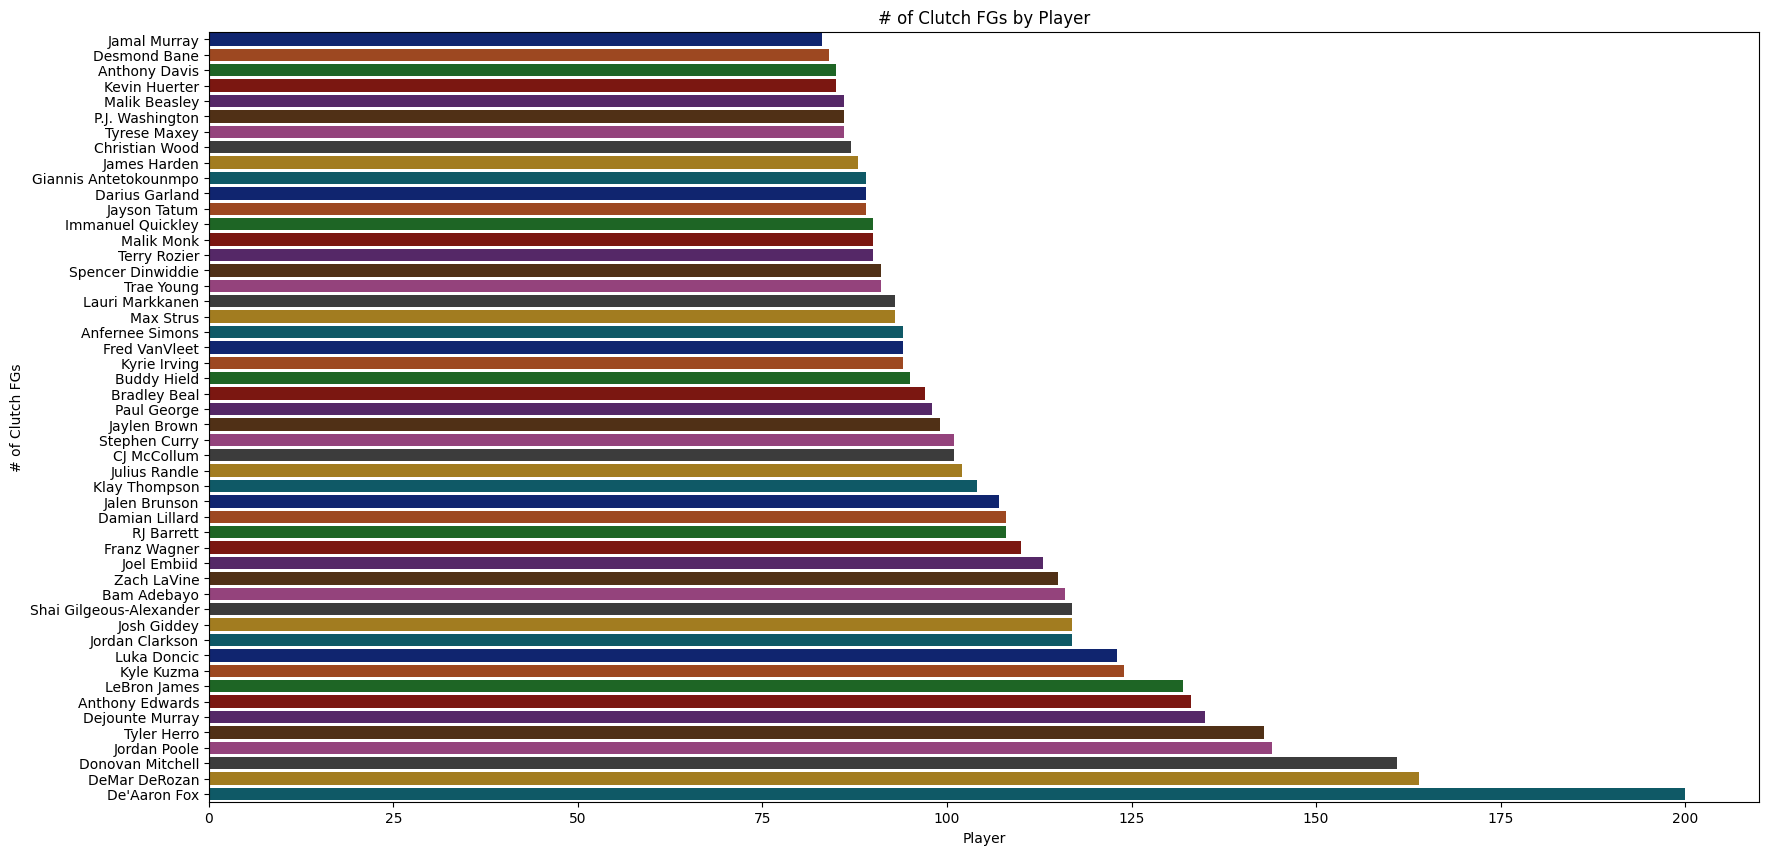

In [92]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Cltch_FGs'],y=df['Player'],data=df,order=df.sort_values('Cltch_FGs').Player,palette = "dark")
plt.xlabel("Player")
plt.ylabel("# of Clutch FGs")
plt.title('# of Clutch FGs by Player')
plt.show()

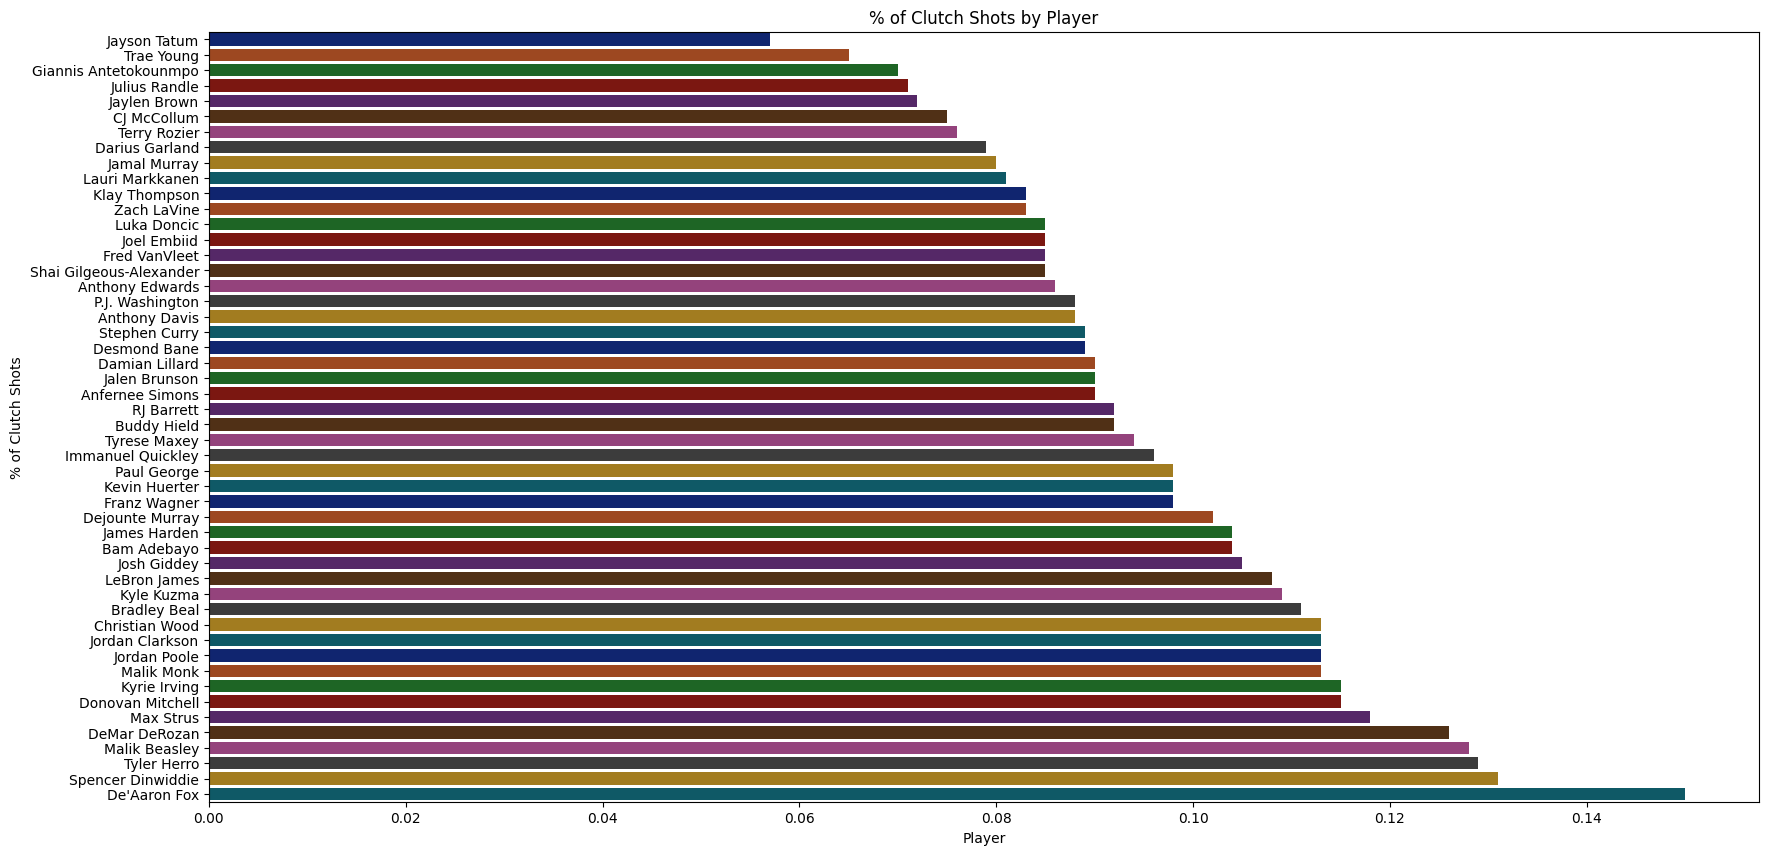

In [93]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Cltch_Shot%'],y=df['Player'],data=df,order=df.sort_values('Cltch_Shot%').Player,palette = "dark")
plt.xlabel("Player")
plt.ylabel("% of Clutch Shots")
plt.title('% of Clutch Shots by Player')
plt.show()

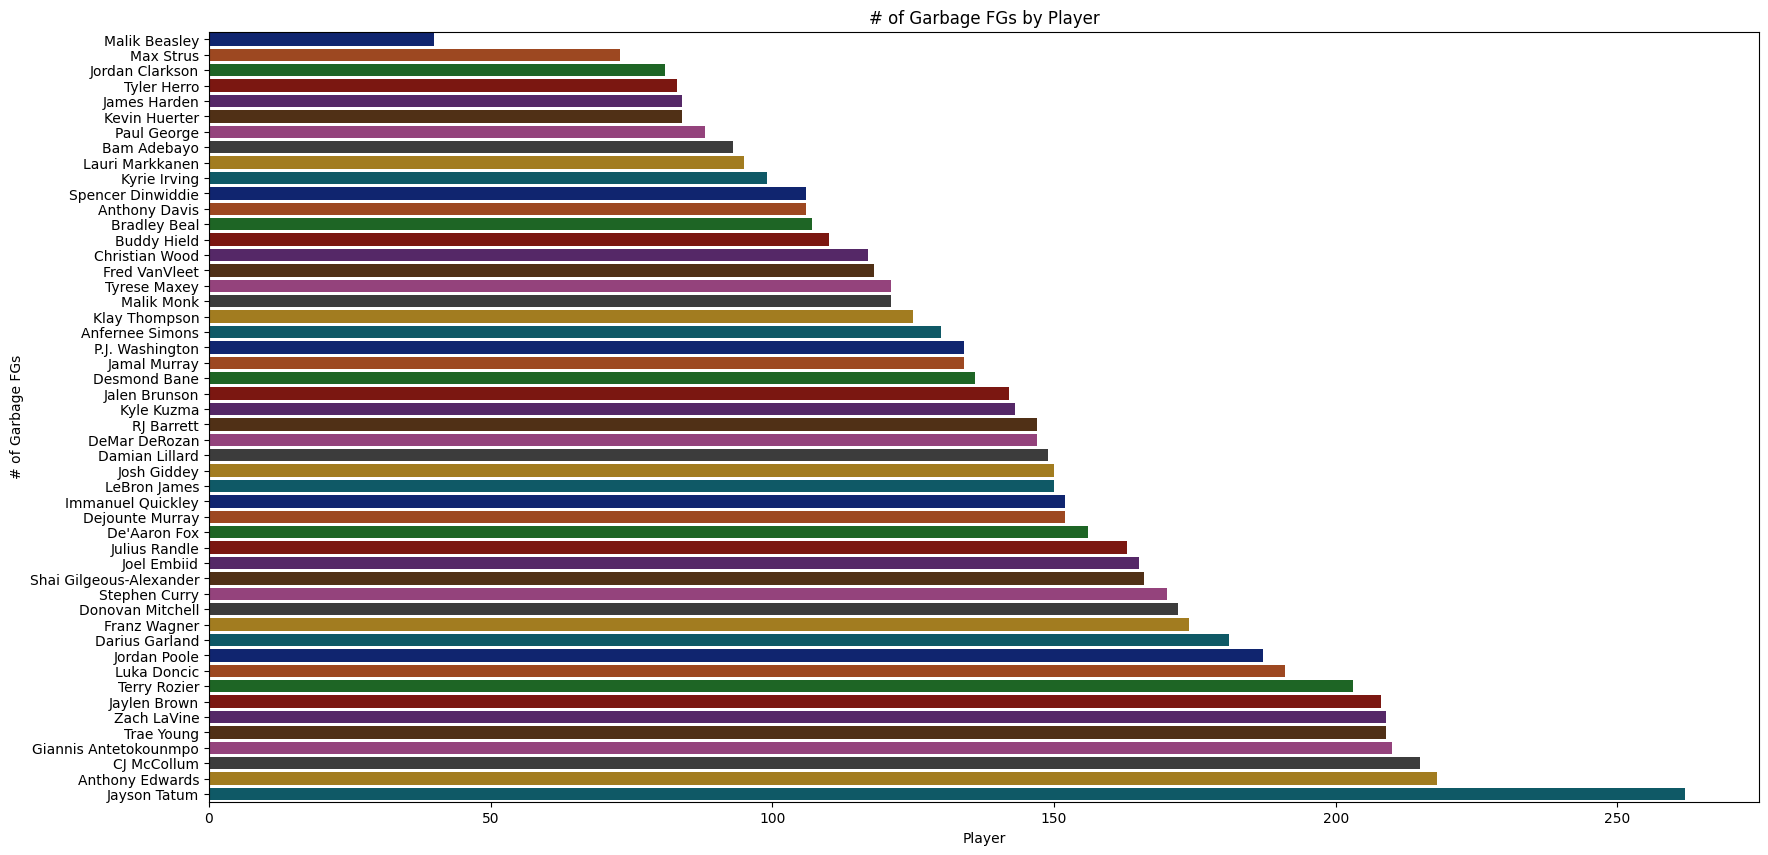

In [90]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Grbg_FGs'],y=df['Player'],data=df,order=df.sort_values('Grbg_FGs').Player,palette = "dark")
plt.xlabel("Player")
plt.ylabel("# of Garbage FGs")
plt.title('# of Garbage FGs by Player')
plt.show()

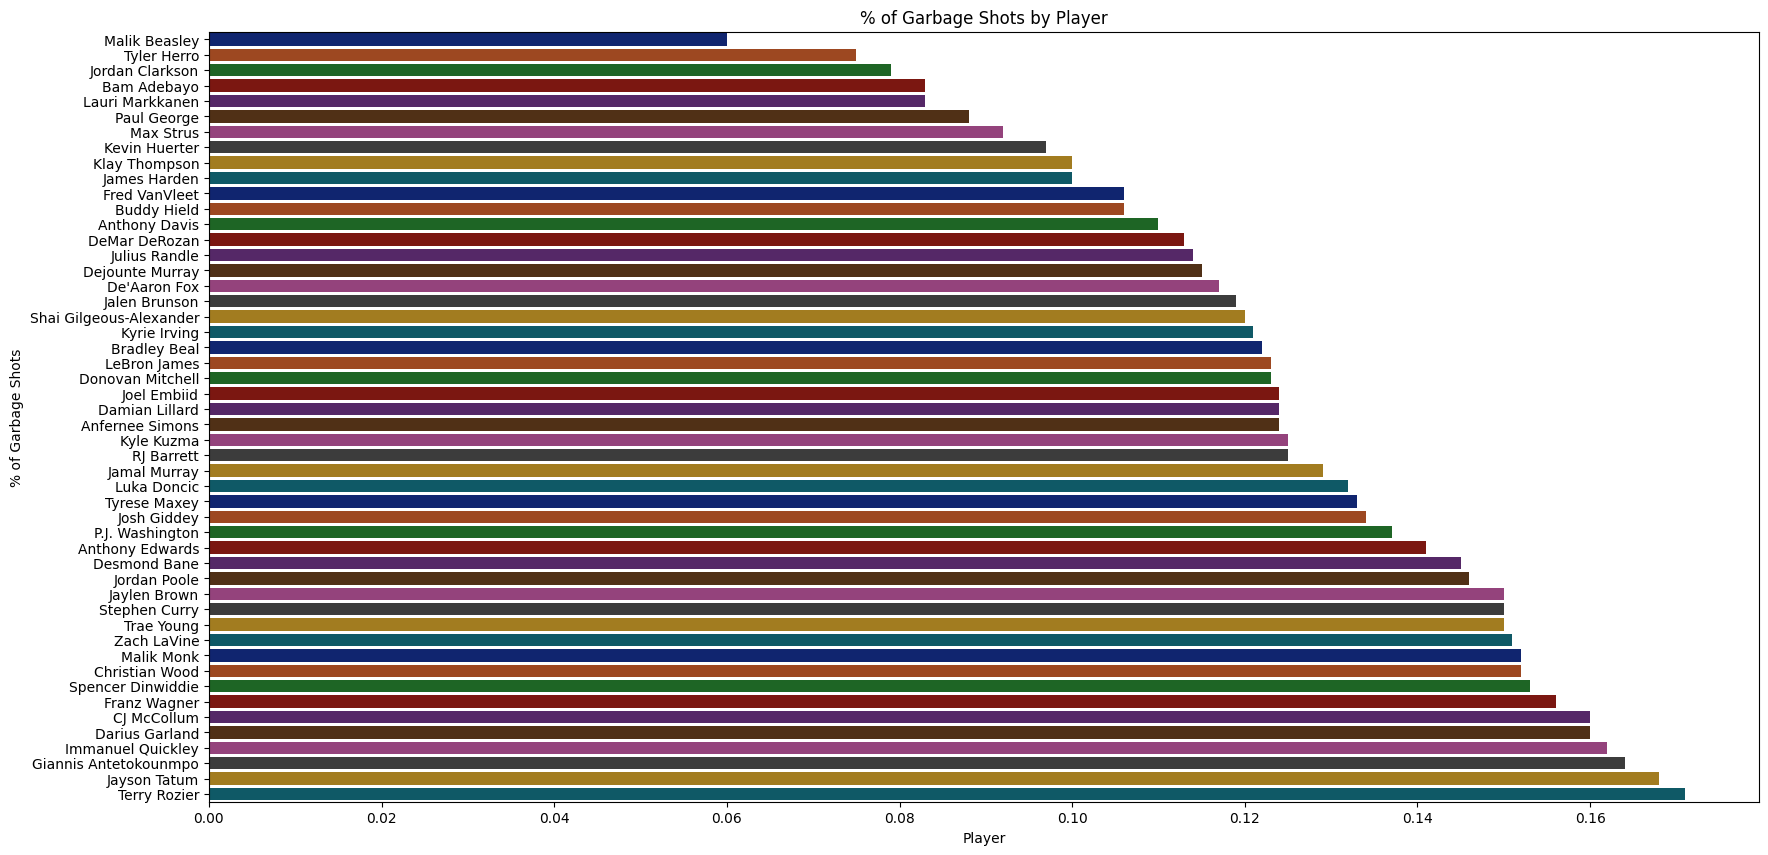

In [100]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Grbg_Shot%'],y=df['Player'],data=df,order=df.sort_values('Grbg_Shot%').Player,palette = "dark")
plt.xlabel("Player")
plt.ylabel("% of Garbage Shots")
plt.title('% of Garbage Shots by Player')
plt.show()

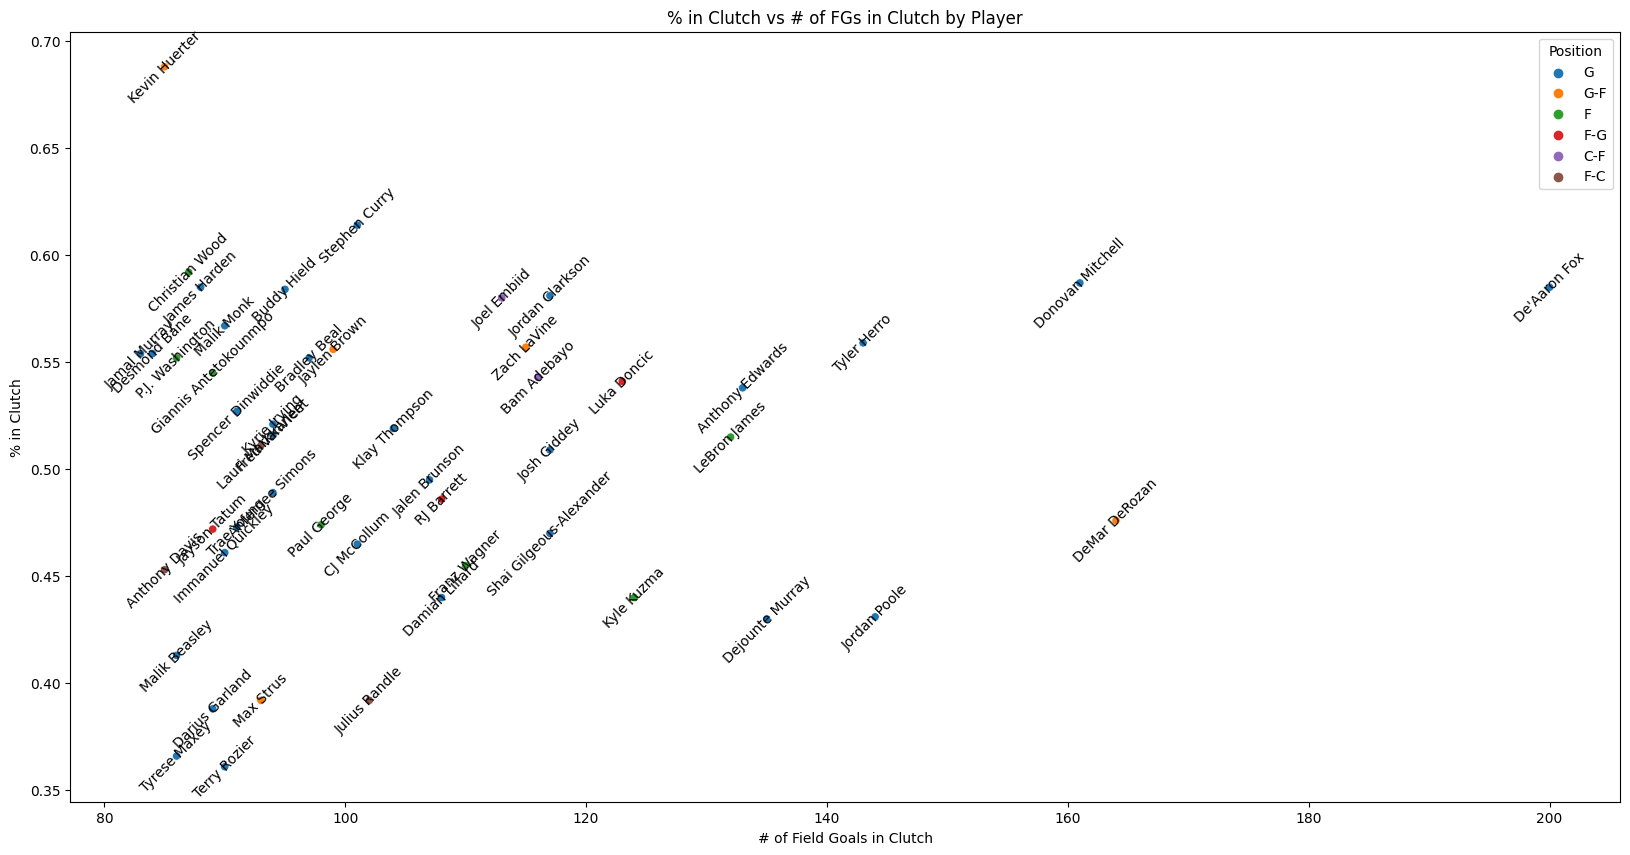

In [58]:
#EDA to visualize Field Goals and % in Clutch
plt.figure(figsize=(20,10))
sns.scatterplot(x= df['Cltch_FGs'],y = df['Cltch_EFG%'],hue=df['Position'])
plt.xlabel("# of Field Goals in Clutch")
plt.ylabel("% in Clutch")
plt.title('% in Clutch vs # of FGs in Clutch by Player')

for i in range(1, len(df) + 1):
    x = df['Cltch_FGs'][i]
    y = df['Cltch_EFG%'][i]
    label = df['Player'][i]
    plt.text(x, y, label, ha='center', va='center', rotation=45)

plt.show()

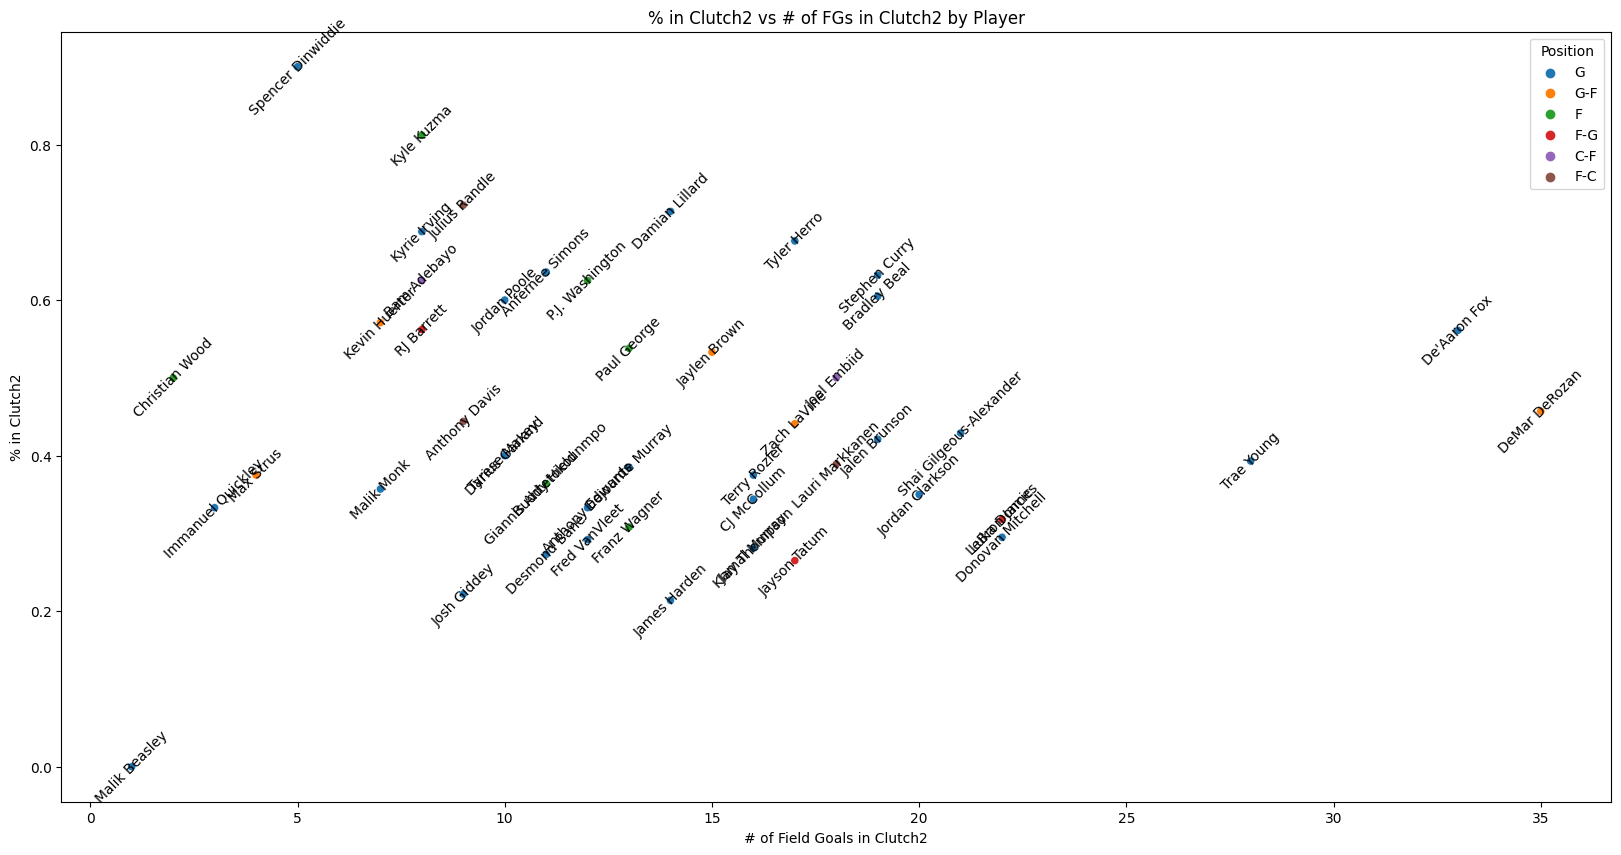

In [60]:
#EDA to visualize Field Goals and % in Clutch2
plt.figure(figsize=(20,10))
sns.scatterplot(x= df['Cltch2_FGs'],y = df['Cltch2_EFG%'],hue=df['Position'])
plt.xlabel("# of Field Goals in Clutch2")
plt.ylabel("% in Clutch2")
plt.title('% in Clutch2 vs # of FGs in Clutch2 by Player')

for i in range(1, len(df) + 1):
    x = df['Cltch2_FGs'][i]
    y = df['Cltch2_EFG%'][i]
    label = df['Player'][i]
    plt.text(x, y, label, ha='center', va='center', rotation=45)

plt.show()

In [72]:
#Correlation Matrix using Pearsons CE for linear relationships
corr = num_df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,Games,Grbg_FGs,Nrml_FGs,Cltch_FGs,Cltch2_FGs,Grbg_Shot%,Nrml_Shot%,Cltch_Shot%,Cltch2_Shot%,Grbg_EFG%,Nrml_EFG%,Cltch_EFG%,Cltch2_EFG%
Games,1.00,0.35,0.38,0.25,-0.00,0.17,-0.03,-0.15,-0.18,-0.07,-0.25,-0.06,-0.18
Grbg_FGs,0.35,1.00,0.72,0.19,0.35,0.78,-0.40,-0.58,0.12,-0.01,-0.14,-0.14,-0.08
Nrml_FGs,0.38,0.72,1.00,0.43,0.55,0.16,0.17,-0.53,0.29,-0.08,-0.15,-0.08,-0.07
Cltch_FGs,0.25,0.19,0.43,1.00,0.59,-0.16,-0.30,0.51,0.46,-0.04,-0.14,0.11,0.13
Cltch2_FGs,-0.00,0.35,0.55,0.59,1.00,-0.00,-0.17,-0.02,0.94,-0.12,-0.05,0.18,-0.06
Grbg_Shot%,0.17,0.78,0.16,-0.16,-0.00,1.00,-0.71,-0.41,-0.09,0.08,-0.05,-0.11,0.03
Nrml_Shot%,-0.03,-0.40,0.17,-0.30,-0.17,-0.71,1.00,-0.33,-0.18,-0.07,0.06,-0.06,-0.17
Cltch_Shot%,-0.15,-0.58,-0.53,0.51,-0.02,-0.41,-0.33,1.00,0.10,0.01,-0.01,0.17,0.19
Cltch2_Shot%,-0.18,0.12,0.29,0.46,0.94,-0.09,-0.18,0.10,1.00,-0.08,0.00,0.27,-0.01
Grbg_EFG%,-0.07,-0.01,-0.08,-0.04,-0.12,0.08,-0.07,0.01,-0.08,1.00,0.23,0.21,0.12


In [98]:
#Create a numeric df for scaling
num_df = df.iloc[:,4:17]
num_df.index = df['Player']
num_df.head()

#scaling the data
#create two different dfs for clutch and clutch2 data
num_df2 = num_df[['Cltch2_FGs','Cltch2_EFG%']]
num_df3 = num_df[['Cltch_FGs','Cltch_EFG%']]

df_scaled_cltch2 = pd.DataFrame(normalize(num_df2),columns=num_df2.columns)
df_scaled_cltch2.index+=1
df_scaled_cltch2.index = df['Player']    
df_scaled_cltch2.head()

df_scaled_cltch = pd.DataFrame(normalize(num_df3),columns=num_df3.columns)
df_scaled_cltch.index+=1
df_scaled_cltch.index = df['Player']    
df_scaled_cltch.head()

,Cltch_FGs,Cltch_EFG%
Player,,
De'Aaron Fox,0.999996,0.002925
DeMar DeRozan,0.999996,0.002902
Donovan Mitchell,0.999993,0.003646
Jordan Poole,0.999996,0.002993
Tyler Herro,0.999992,0.003909


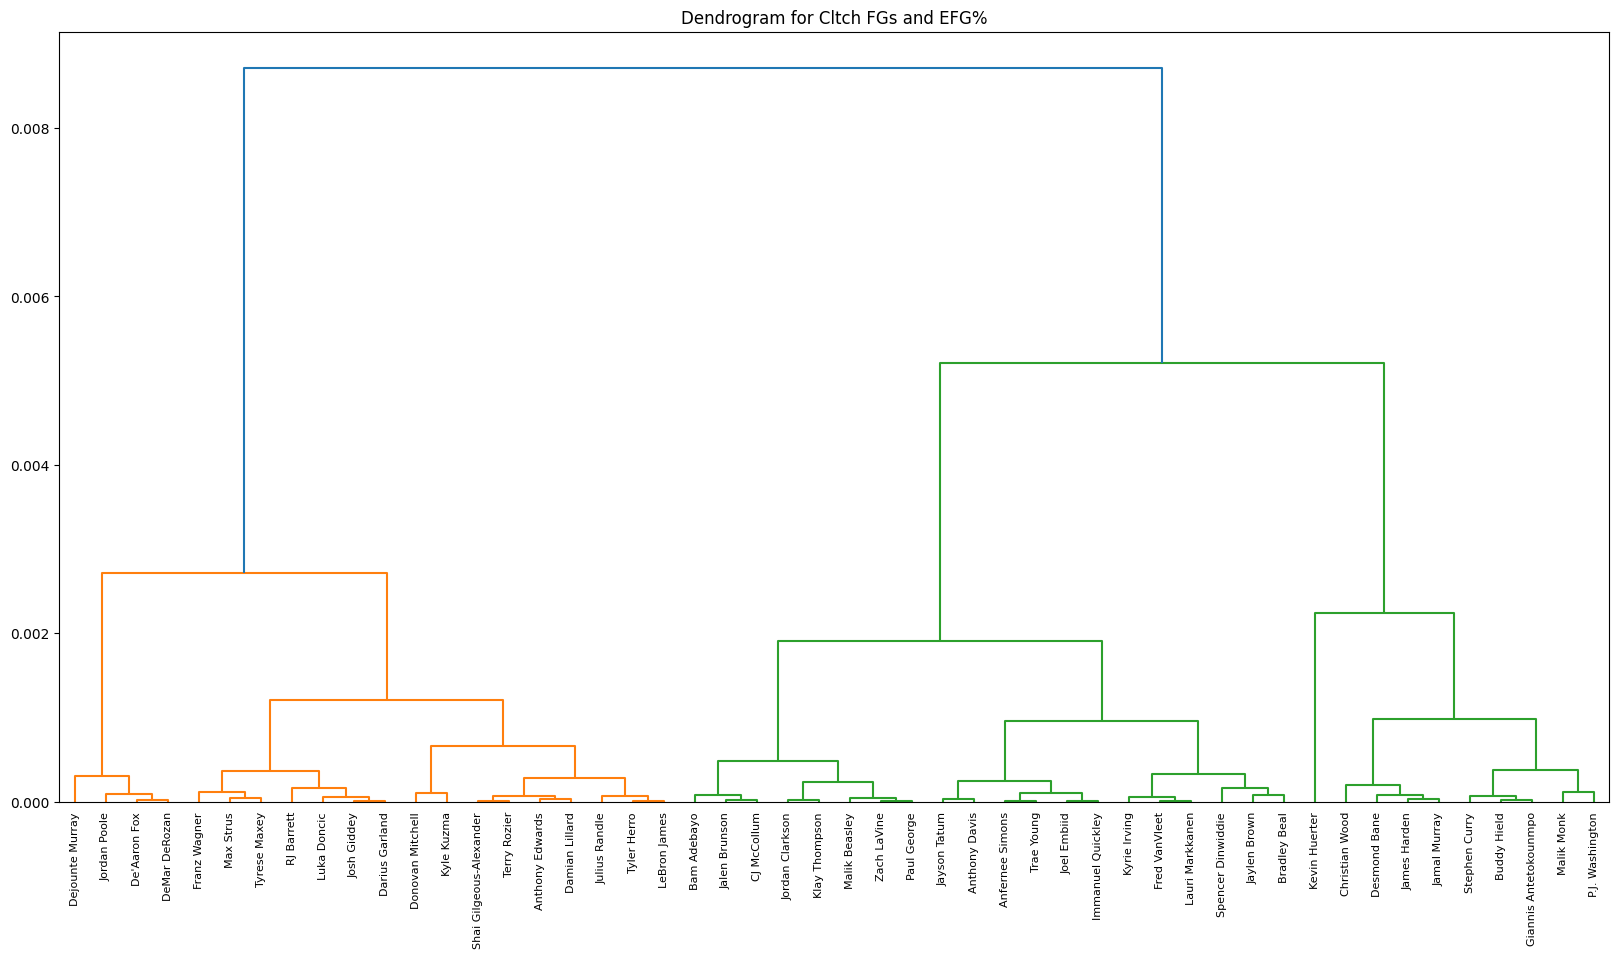

In [94]:
##plotting a dendrogram from hierarchical clustering using ward method for linkage
plt.figure(figsize=(20,10))
plt.title('Dendrogram for Cltch FGs and EFG%')
dend = shc.dendrogram(shc.linkage(df_scaled_cltch,method='ward'),labels=df_scaled_cltch.index)

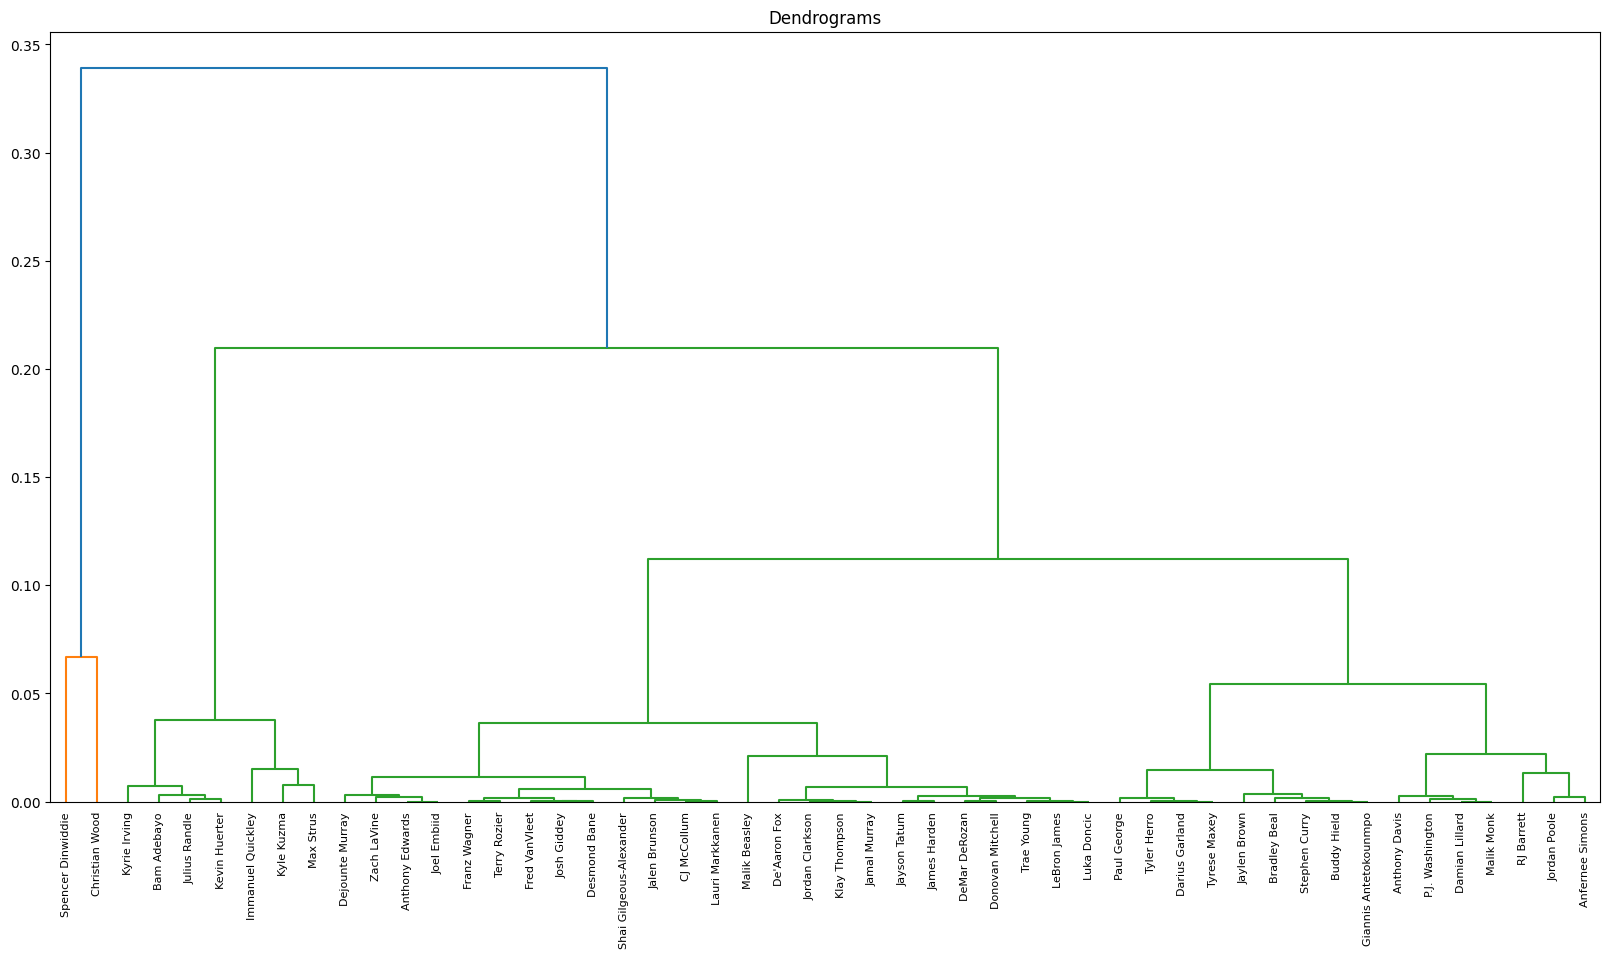

In [67]:
##plotting a dendrogram from hierarchical clustering using ward method for linkage
plt.figure(figsize=(20,10))
plt.title('Dendrogram for Cltch2 FGs and EFG%')
dend = shc.dendrogram(shc.linkage(df_scaled_cltch2,method='ward'),labels=df_scaled_cltch2.index)

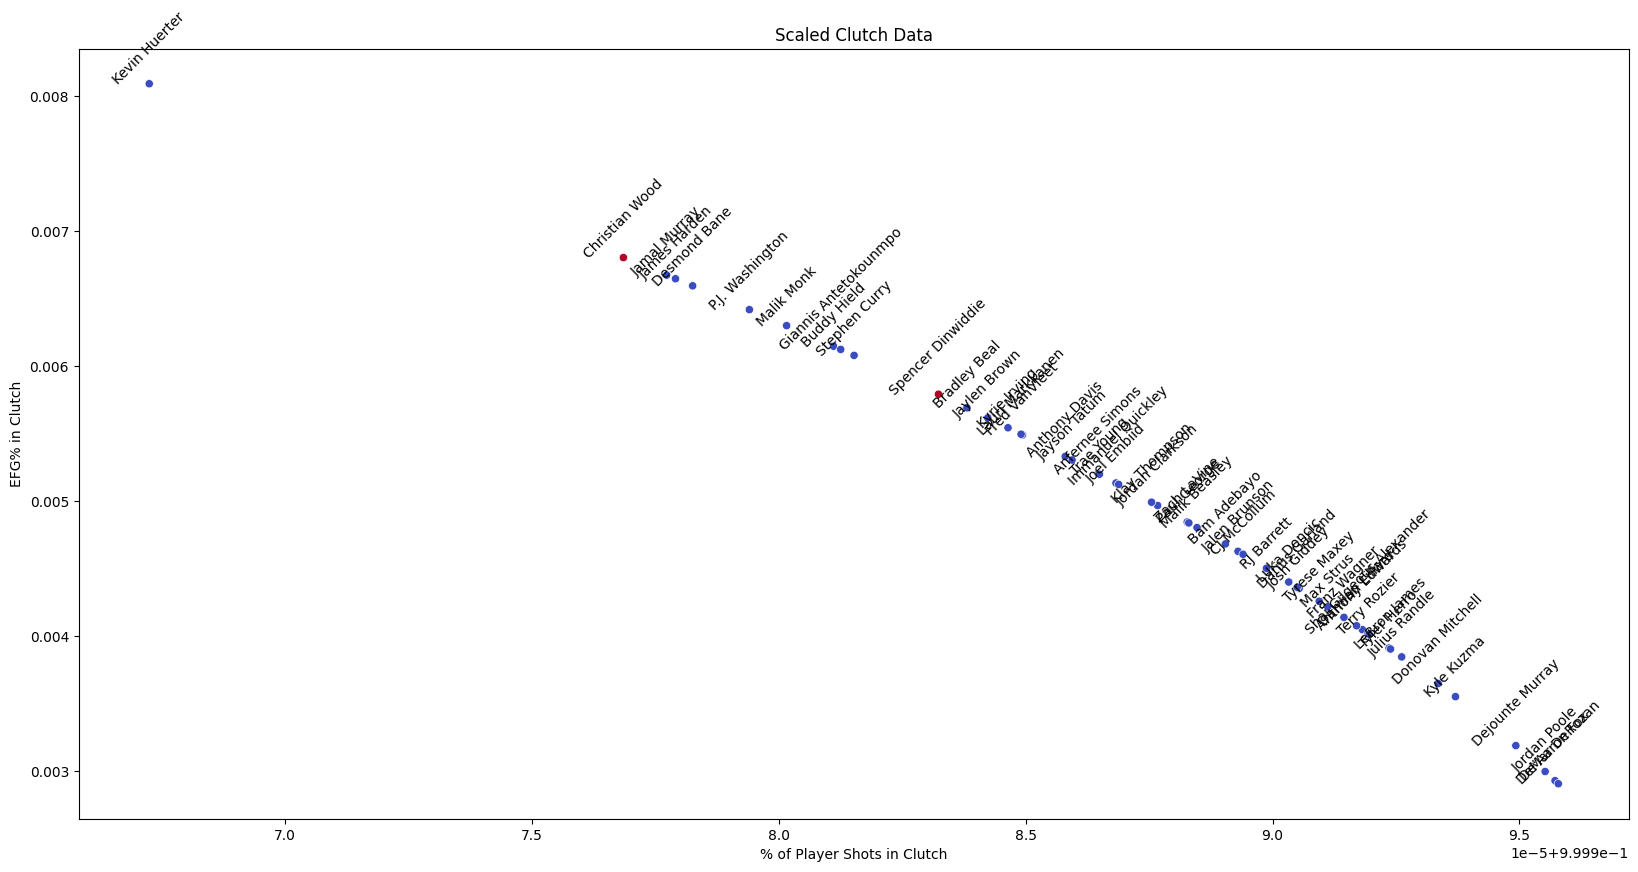

In [99]:
##agglomerative clustering 
cluster = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cluster.fit_predict(df_scaled_cltch2)

plt.figure(figsize=(20, 10))  
#plt.xlim(-.00001,.00008)
#plt.ylim(-.0005,.00225)

sns.scatterplot(x=df_scaled_cltch['Cltch_FGs'], 
            y=df_scaled_cltch['Cltch_EFG%'],cmap='coolwarm',c=cluster.labels_)



plt.title('Scaled Clutch Data')
plt.xlabel('# of Player Shots in Clutch')
plt.ylabel('EFG% in Clutch')


for i, name in enumerate(df['Player']):
    plt.annotate(name, (df_scaled_cltch['Cltch_FGs'][i], 
            df_scaled_cltch['Cltch_EFG%'][i]),rotation=45, ha='center')
'''
# Selectively annotate a subset of points
texts = []
for i, name in enumerate(df['']['Player']):
    x = df_scaled['% of Player Shots']['Cltch2'][i]
    y = df_scaled['Effective Field Goal %']['Cltch2'][i]
    texts.append(plt.text(x, y, name, ha='center', va='center', rotation=45))

# Adjust the positions of labels to minimize overlap
adjust_text(texts)
'''
plt.show()

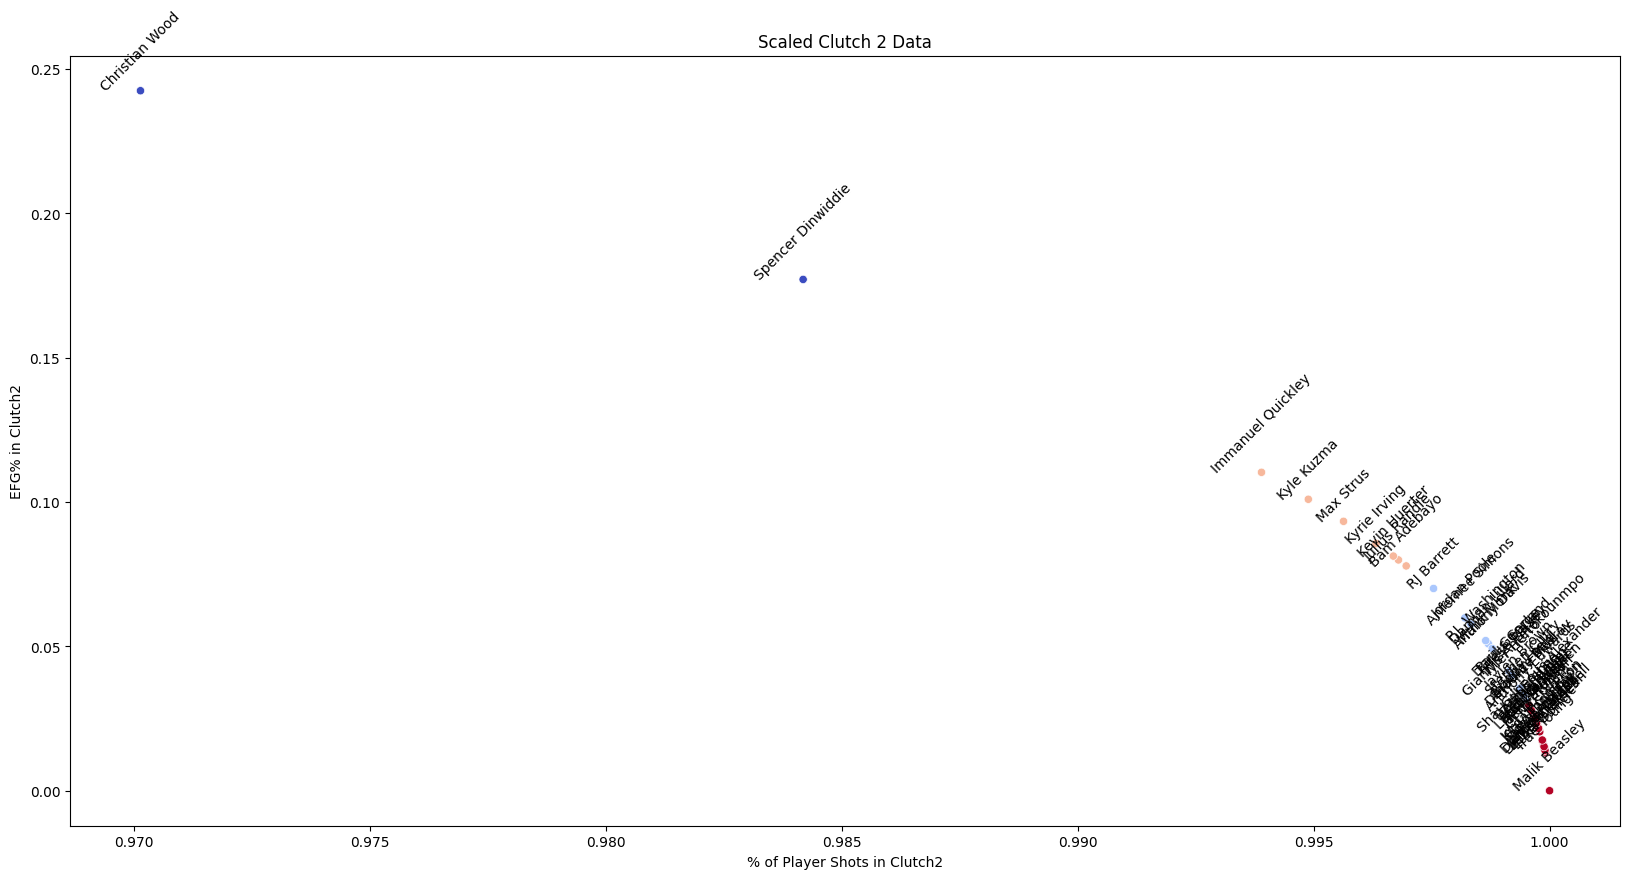

In [68]:
##agglomerative clustering 
cluster = AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward')
cluster.fit_predict(df_scaled_cltch2)

plt.figure(figsize=(20, 10))  
#plt.xlim(-.00001,.00008)
#plt.ylim(-.0005,.00225)

sns.scatterplot(x=df_scaled_cltch2['Cltch2_FGs'], 
            y=df_scaled_cltch2['Cltch2_EFG%'],cmap='coolwarm',c=cluster.labels_)


plt.title('Scaled Clutch 2 Data')
plt.xlabel('%#of Player Shots in Clutch2')
plt.ylabel('EFG% in Clutch2')

for i, name in enumerate(df['Player']):
    plt.annotate(name, (df_scaled_cltch2['Cltch2_FGs'][i], 
            df_scaled_cltch2['Cltch2_EFG%'][i]),rotation=45, ha='center')
'''
# Selectively annotate a subset of points
texts = []
for i, name in enumerate(df['']['Player']):
    x = df_scaled['% of Player Shots']['Cltch2'][i]
    y = df_scaled['Effective Field Goal %']['Cltch2'][i]
    texts.append(plt.text(x, y, name, ha='center', va='center', rotation=45))

# Adjust the positions of labels to minimize overlap
adjust_text(texts)
'''
plt.show()

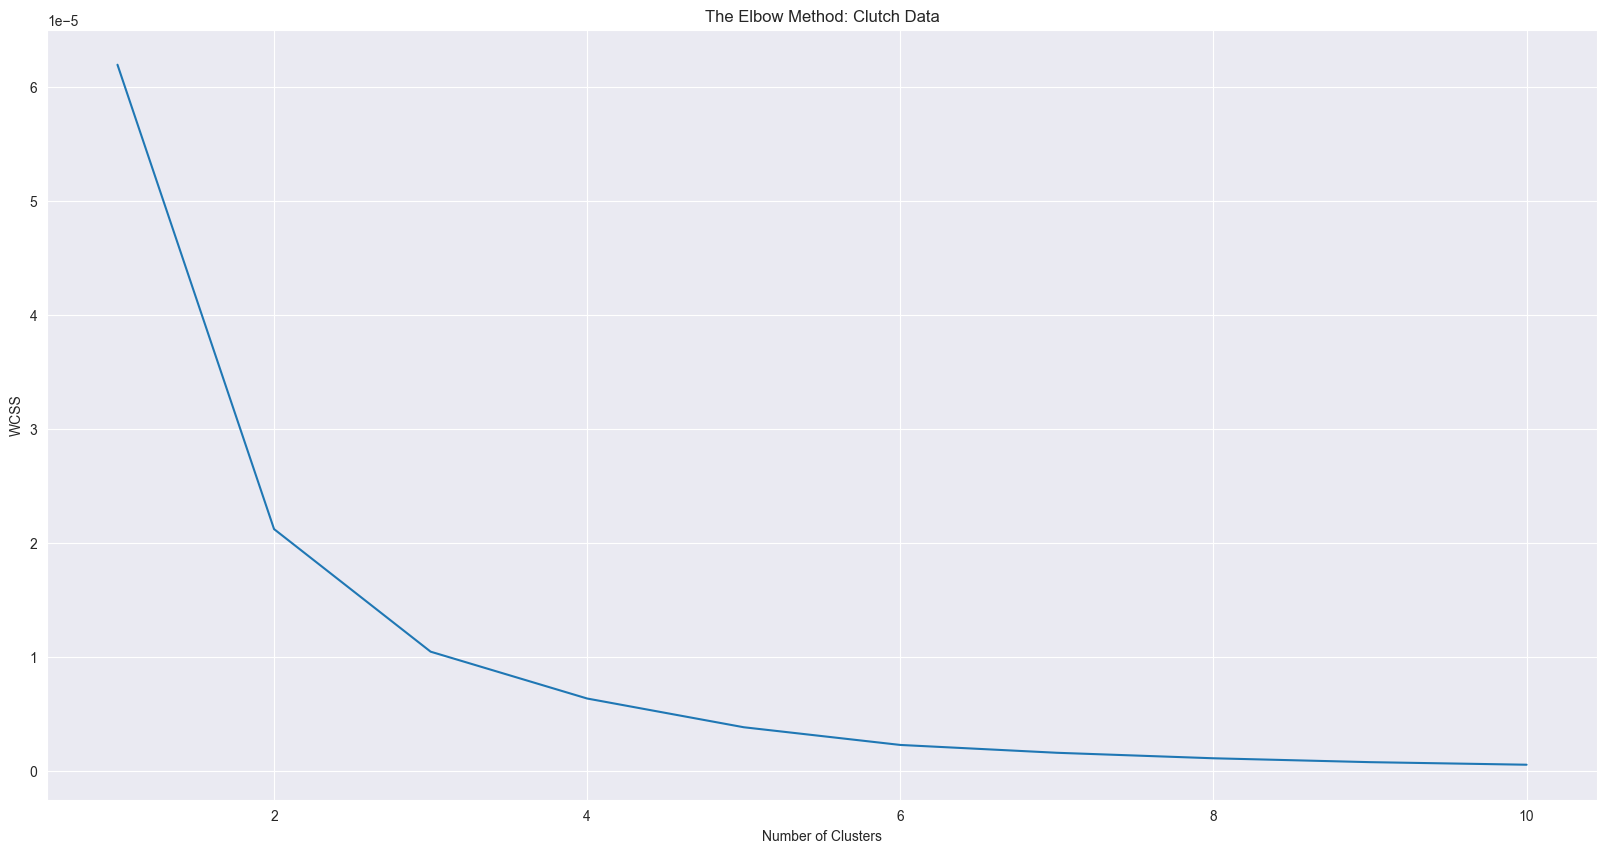

In [111]:
#k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2,init = 'random', n_init = 10)
kmeans.fit(df_scaled_cltch)
kmeans.cluster_centers_

#plotting elbow method for optimal # of clusters
plt.figure(figsize=(20, 10))

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,n_init=10)
    kmeans.fit(df_scaled_cltch)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method: Clutch Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/var/folders/hv/nqvbycm12672cq1wpdxv6z9r0000gn/T/ipykernel_78720/689390385.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kmeans_mean_cluster = pd.DataFrame(round(df.groupby([('cltch_cluster')]).mean(), 1))


,Games,Grbg_FGs,Nrml_FGs,Cltch_FGs,Cltch2_FGs,Grbg_Shot%,Nrml_Shot%,Cltch_Shot%,Cltch2_Shot%,Grbg_EFG%,Nrml_EFG%,Cltch_EFG%,Cltch2_EFG%,,cltch2_cluster
cltch_cluster,,,,,,,,,,,,,,,
1,66.3,135.1,743.8,89.2,11.4,0.1,0.8,0.1,0.0,0.6,0.6,0.6,0.4,NaN,3.1
2,68.3,138.5,897.3,106.8,13.2,0.1,0.8,0.1,0.0,0.5,0.5,0.5,0.4,NaN,3.2
3,68.2,151.2,921.2,116.6,14.0,0.1,0.8,0.1,0.0,0.5,0.5,0.5,0.5,NaN,3.6
4,75.0,84.0,690.0,85.0,7.0,0.1,0.8,0.1,0.0,0.7,0.6,0.7,0.6,NaN,4.0
5,75.8,160.5,964.0,160.8,22.8,0.1,0.7,0.1,0.0,0.5,0.5,0.5,0.5,NaN,3.0
6,63.1,146.4,850.1,94.2,13.6,0.1,0.8,0.1,0.0,0.6,0.5,0.5,0.5,NaN,3.6


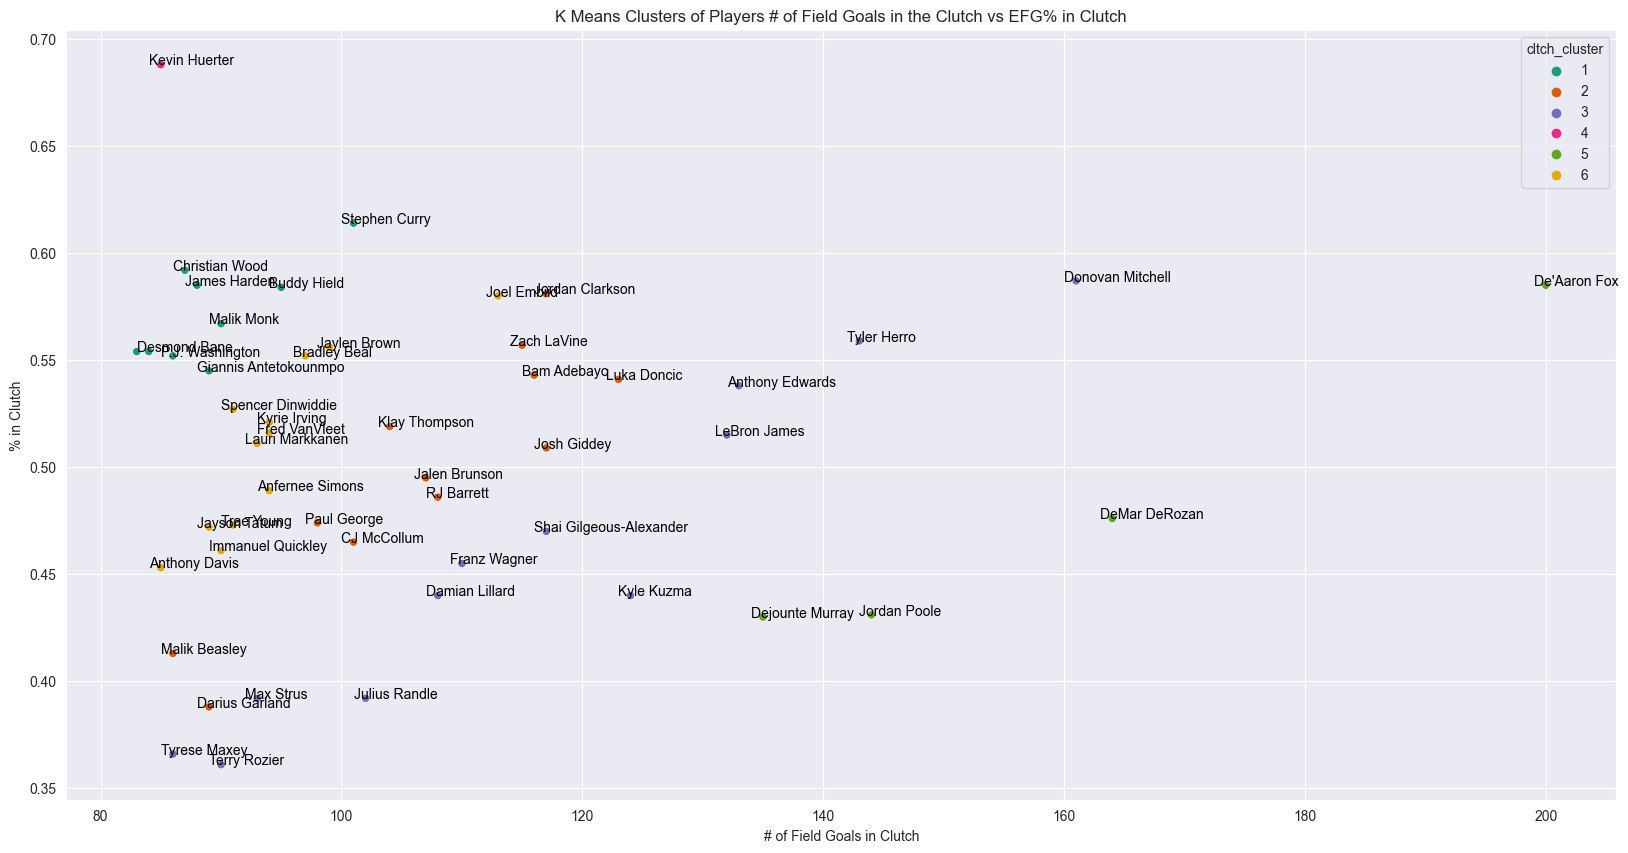

In [112]:
#Figure shows cluster that minimizes wcss is 6
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42,n_init=10)
y_kmeans = kmeans.fit_predict(df_scaled_cltch)

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# Adding cluster to the Dataset1
df.loc[:, ('cltch_cluster')] = y_kmeans1

plt.figure(figsize=(20, 10))
sns.set_style('darkgrid')
p1 = sns.scatterplot(x=df['Cltch_FGs'], y=df['Cltch_EFG%'], palette='Dark2', hue=df['cltch_cluster'])

for line in range(1, df.shape[0]):
    p1.text(x=df['Cltch_FGs'][line]-1, y=df['Cltch_EFG%'][line],
             s=df['Player'][line], horizontalalignment='left',
             size='medium', color='black')
     #adjust_text(texts,arrowprops=dict(arrowstyle='->', color='red'))
        
plt.xlabel("# of Field Goals in Clutch")
plt.ylabel("% in Clutch")
plt.title('K Means Clusters of Players # of Field Goals in the Clutch vs EFG% in Clutch')

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(df.groupby([('cltch_cluster')]).mean(), 1))
kmeans_mean_cluster

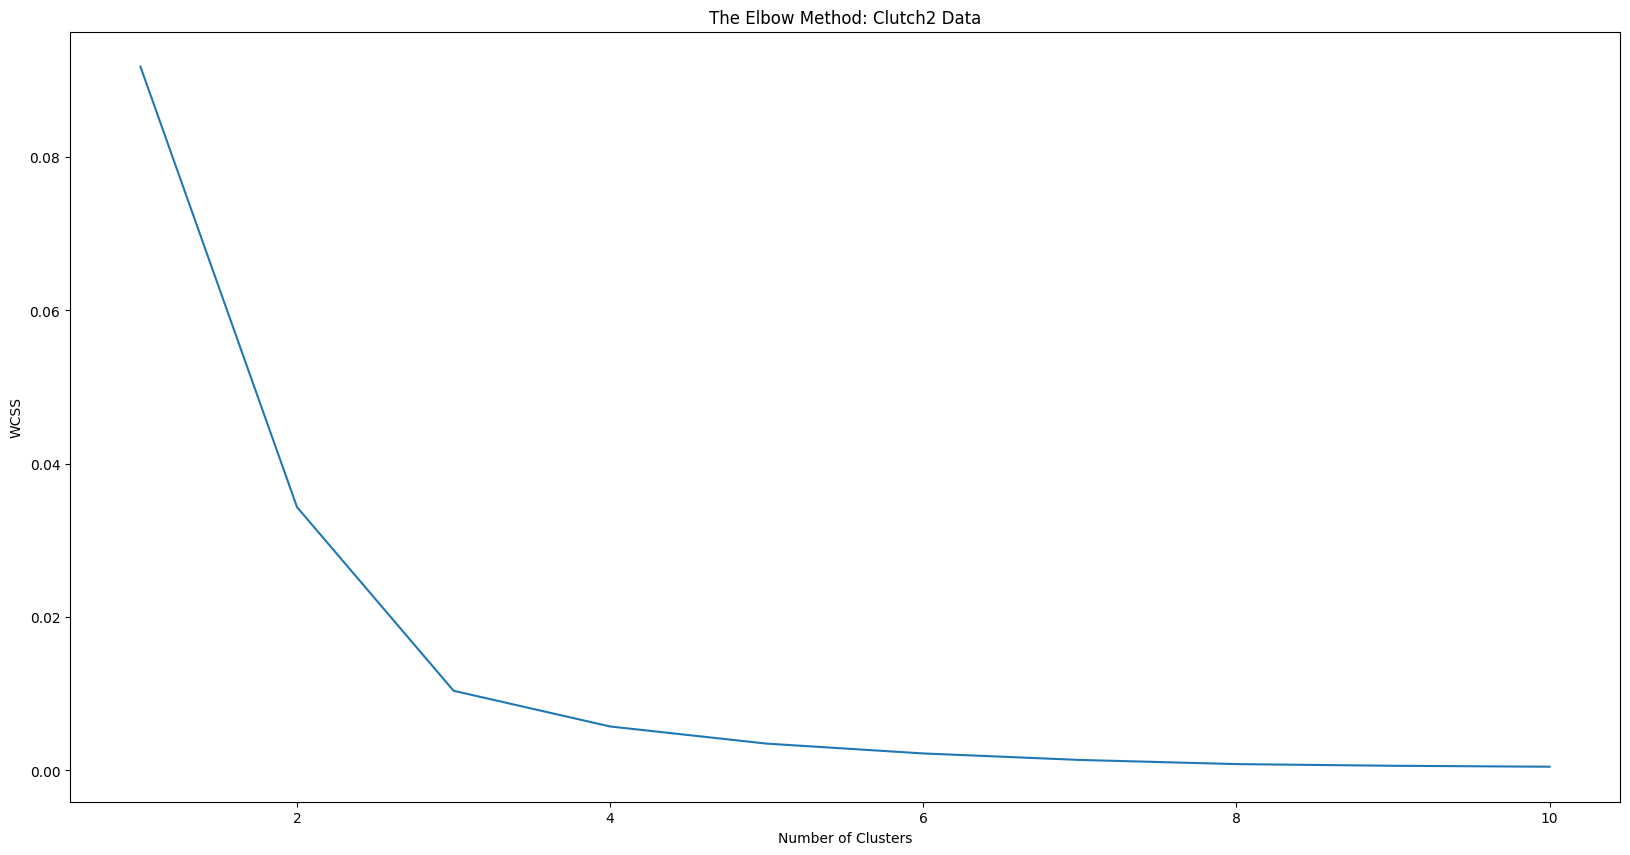

In [104]:
#k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2,init = 'random', n_init = 10)
kmeans.fit(df_scaled_cltch2)
kmeans.cluster_centers_

#plotting elbow method for optimal # of clusters
plt.figure(figsize=(20, 10))

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,n_init=10)
    kmeans.fit(df_scaled_cltch2)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method: Clutch2 Data')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/var/folders/hv/nqvbycm12672cq1wpdxv6z9r0000gn/T/ipykernel_78720/2178487624.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kmeans_mean_cluster = pd.DataFrame(round(df.groupby([('cltch2_cluster')]).mean(), 1))


,Games,Grbg_FGs,Nrml_FGs,Cltch_FGs,Cltch2_FGs,Grbg_Shot%,Nrml_Shot%,Cltch_Shot%,Cltch2_Shot%,Grbg_EFG%,Nrml_EFG%,Cltch_EFG%,Cltch2_EFG%,
cltch2_cluster,,,,,,,,,,,,,,
1,68.7,139.1,811.1,102.1,10.1,0.1,0.8,0.1,0.0,0.6,0.5,0.5,0.6,NaN
2,67.0,117.0,563.0,87.0,2.0,0.2,0.7,0.1,0.0,0.6,0.6,0.6,0.5,NaN
3,67.8,152.7,917.9,112.1,18.1,0.1,0.8,0.1,0.0,0.5,0.5,0.5,0.3,NaN
4,70.3,115.3,791.4,100.6,6.7,0.1,0.8,0.1,0.0,0.6,0.6,0.5,0.6,NaN
5,65.6,151.1,899.7,106.5,14.0,0.1,0.8,0.1,0.0,0.6,0.6,0.5,0.5,NaN
6,53.0,106.0,492.0,91.0,5.0,0.2,0.7,0.1,0.0,0.6,0.6,0.5,0.9,NaN


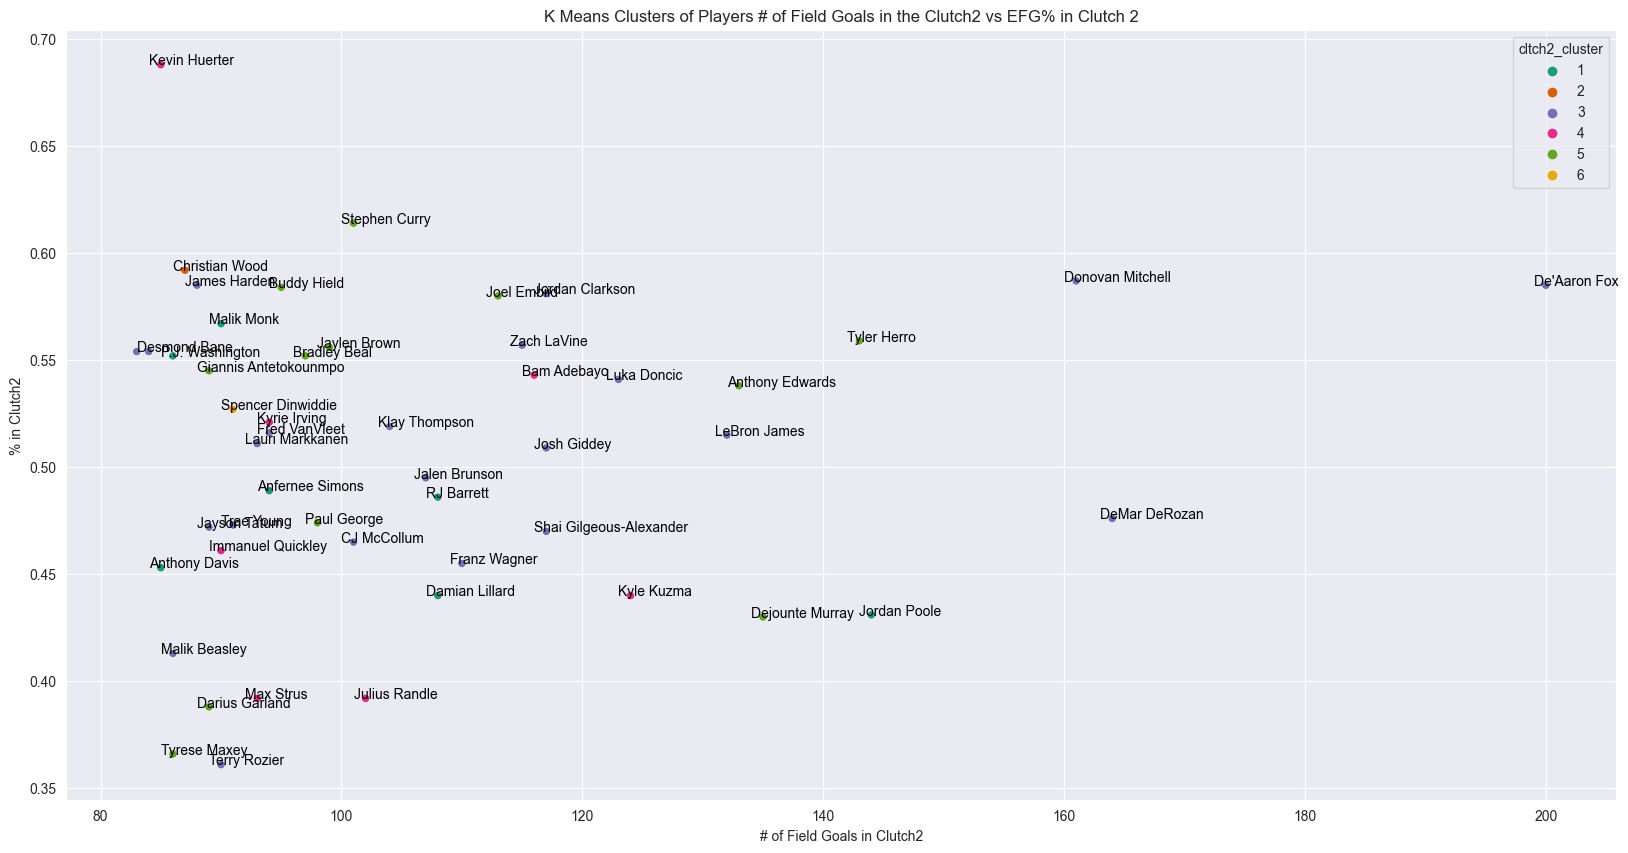

In [110]:
#Figure shows cluster that minimizes wcss is 6
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42,n_init=10)
y_kmeans = kmeans.fit_predict(df_scaled_cltch2)

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# Adding cluster to the Dataset1
df.loc[:, ('cltch2_cluster')] = y_kmeans1

plt.figure(figsize=(20, 10))
sns.set_style('darkgrid')
p1 = sns.scatterplot(x=df['Cltch2_FGs'], y=df['Cltch2_EFG%'], palette='Dark2', hue=df['cltch2_cluster'])

for line in range(1, df.shape[0]):
    p1.text(x=df['Cltch2_FGs'][line]-1, y=df['Cltch2_EFG%'][line],
             s=df['Player'][line], horizontalalignment='left',
             size='medium', color='black')
     #adjust_text(texts,arrowprops=dict(arrowstyle='->', color='red'))
        
plt.xlabel("# of Field Goals in Clutch2")
plt.ylabel("% in Clutch2")
plt.title('K Means Clusters of Players # of Field Goals in the Clutch2 vs EFG% in Clutch')

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(df.groupby([('cltch2_cluster')]).mean(), 1))
kmeans_mean_cluster

In [105]:
df.columns

Index(['Rank', 'Player', 'Position', 'Team', 'Games', 'Grbg_FGs', 'Nrml_FGs',
       'Cltch_FGs', 'Cltch2_FGs', 'Grbg_Shot%', 'Nrml_Shot%', 'Cltch_Shot%',
       'Cltch2_Shot%', 'Grbg_EFG%', 'Nrml_EFG%', 'Cltch_EFG%', 'Cltch2_EFG%'],
      dtype='object')